In [39]:
from deeplabv3.network.modeling import _segm_resnet


In [40]:
model = _segm_resnet(name="deeplabv3plus", backbone_name="resnet50", num_classes=2, output_stride=8, pretrained_backbone=True)
model.eval()


DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [46]:
from PIL import Image

im = Image.open("samples/1_image.png")

In [47]:
import torch
import numpy as np

image_arr = np.array(im).astype(np.float32).transpose((2, 0, 1))
tensor_image = torch.tensor(image_arr)
tensor_image = tensor_image.unsqueeze(0)

result = model(tensor_image)
print(f"result: {result}")

result: tensor([[[[ 73.4690,  73.4690,  84.1954,  ..., 104.8203, 103.3072, 103.3072],
          [ 73.4690,  73.4690,  84.1954,  ..., 104.8203, 103.3072, 103.3072],
          [ 75.1721,  75.1721,  83.6305,  ...,  95.5470,  94.3827,  94.3827],
          ...,
          [  0.3282,   0.3282,  -3.6419,  ...,  -2.0347,  -3.6127,  -3.6127],
          [ -3.2031,  -3.2031,  -7.8754,  ...,  -5.5667,  -7.2166,  -7.2166],
          [ -3.2031,  -3.2031,  -7.8754,  ...,  -5.5667,  -7.2166,  -7.2166]],

         [[125.4091, 125.4091, 124.5045,  ..., -30.2549, -27.3855, -27.3855],
          [125.4091, 125.4091, 124.5045,  ..., -30.2549, -27.3855, -27.3855],
          [112.4636, 112.4636, 111.4244,  ..., -38.9425, -36.1499, -36.1499],
          ...,
          [ 37.7299,  37.7299,  28.7570,  ..., -38.8837, -39.5934, -39.5934],
          [ 42.3353,  42.3353,  33.4688,  ..., -30.1762, -31.4464, -31.4464],
          [ 42.3353,  42.3353,  33.4688,  ..., -30.1762, -31.4464, -31.4464]]]],
       grad_fn=<Upsam

tensor([[[[2.7715e-23, 2.7715e-23, 3.1187e-18,  ..., 1.0000e+00,
           1.0000e+00, 1.0000e+00],
          [2.7715e-23, 2.7715e-23, 3.1187e-18,  ..., 1.0000e+00,
           1.0000e+00, 1.0000e+00],
          [6.3752e-17, 6.3752e-17, 8.4970e-13,  ..., 1.0000e+00,
           1.0000e+00, 1.0000e+00],
          ...,
          [5.7104e-17, 5.7104e-17, 8.4988e-15,  ..., 1.0000e+00,
           1.0000e+00, 1.0000e+00],
          [1.6708e-20, 1.6708e-20, 1.1078e-18,  ..., 1.0000e+00,
           1.0000e+00, 1.0000e+00],
          [1.6708e-20, 1.6708e-20, 1.1078e-18,  ..., 1.0000e+00,
           1.0000e+00, 1.0000e+00]],

         [[1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          ...,
          [1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 9.9240

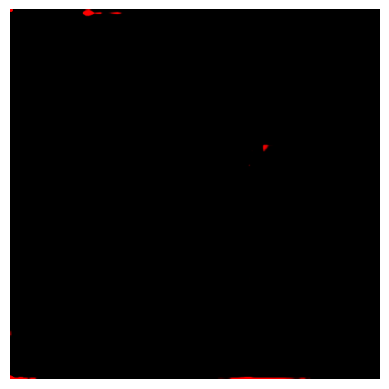

In [48]:
import matplotlib.pyplot as plt
import torch.nn.functional as F

# Compute softmax scores
softmax_scores = F.softmax(result, dim=1)

# Get the scores for class 1
class_1_scores = softmax_scores[0, 1].detach().cpu().numpy()

print(softmax_scores)

# Create a color map based on the scores for class 1
# Higher scores will result in a more intense red color
color_map = np.zeros((class_1_scores.shape[0], class_1_scores.shape[1], 3))
color_map[:, :, 0] = class_1_scores * 255  # Red channel

# # Display the color-coded image
plt.imshow(color_map.astype(np.uint8))
plt.axis('off')  # Optionally remove the axes for better visualization
plt.show()


In [ ]:
image_file_path = "ocelot_data/images/train/cell/"
segmentation_file_path = "ocelot_data/annotations/train/cell/"


image_files = [
    os.path.join(image_file_path, file_name)
    for file_name in os.listdir(image_file_path)
]
image_files.sort()

segmentation_files = [
    os.path.join(segmentation_file_path, file_name)
    for file_name in os.listdir(segmentation_file_path)
]
segmentation_files.sort()

In [ ]:
import cv2

def create_cell_segmentation_image(
    annotated_data: torch.Tensor,
    cell_mpp: float,
    radius: float = 1.4,
    image_size: int = 1024,
):
    pixel_radius = int(radius / cell_mpp)
    image = np.zeros((image_size, image_size), dtype="uint8")

    for x, y, label in annotated_data:
        cv2.circle(
            image, (x.item(), y.item()), pixel_radius, label.item(), -1
        )  # -1 fills the circle
    return image


segmented_cell_folder = "ocelot_data/annotations/train/segmented_cell/"
os.makedirs(segmented_cell_folder, exist_ok=True)

for data_id, data_object in data.items():
    annotated_data = data_object["cell_annotated"]
    cell_mpp = data_object["cell_mpp"]

    segmented_cell_image = create_cell_segmentation_image(
        annotated_data=annotated_data, cell_mpp=cell_mpp
    )
    image_path = os.path.join(segmented_cell_folder, f"{data_id}.png")
    cv2.imwrite(image_path, segmented_cell_image)

In [ ]:
p = segmented_cell_folder + "288.png"
image = cv2.imread(p, cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.axis('off')  # Optional: Hide axes
plt.show()